<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

# Day 13 - Exercises Solutions

### 1)

Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late.

Which summary statistics would you use if you wanted to get a story on the evening news? Which ones would you use if you wanted to reassure an anxious patient?

Finally, imagine that you are Cecil Adams, author of [The Straight Dope](http://straightdope.com), and your job is to answer the question, “Do first babies arrive late?” Write a paragraph that uses the results in this chapter to answer the question clearly, precisely, and honestly.

**SOLUTION**
- For being on the news, I would use the histograms in percentage of prglngth for first babies and others and the histograms of the babies weight.
- For calm down an anxious patient, I would use also the histograms because to show her/him the wide variety of cases, because she/he might not understand the standard deviation.
- With the current data we don't have enough information to can insure that there is a significant difference, in order to achieve this we should make new histograms in percentage.

### 2)

Do the following coding exercises:
Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

/home/javi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/javi/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


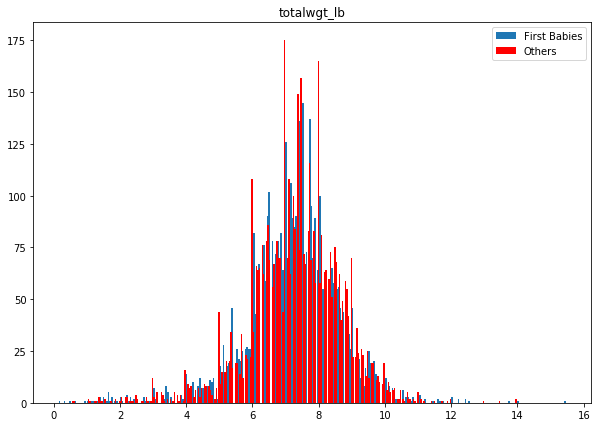

In [36]:
plt.figure(figsize = (10,7))

plt.hist(first_babies['totalwgt_lb'], bins = 300, label ='First Babies', align = 'right')
plt.hist(others['totalwgt_lb'], bins = 300, label ='Others', align = 'left', color ='r')

plt.legend()
plt.title('totalwgt_lb')
plt.show()

In [37]:
d_wgt_fo = cohen_d(first_babies['totalwgt_lb'], others['totalwgt_lb'])

print('d pregnancy length:', d_prglng_fo)
print('d weight:', d_wgt_fo)

d pregnancy length: 0.028879051899871788
d weight: -0.08867293347226901


In this case, the difference between the two groups is much smaller. Before qwe saw a difference of 1.06 std, and now we are seeing a difference of -0.08 std, wich is 92% less

For the next few exercises, we'll load the respondent file:

In [38]:
resp = nsfg.ReadFemResp(dct_file='../Think_Stats/Thinkstats2/2002FemResp.dct',
                        dat_file='Thinkstats2/2002FemResp.dat.gz', 
                        clean = True)

In [39]:
# resp.head()

Make a histogram of `totincr` the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

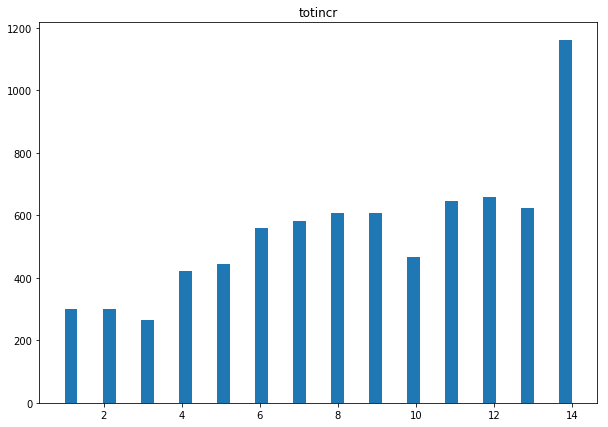

In [40]:
plt.figure(figsize = (10,7))

plt.hist(resp['totincr'], bins = 40)

plt.title('totincr')

plt.show()

Make a histogram of `age_r`, the respondent's age at the time of interview.

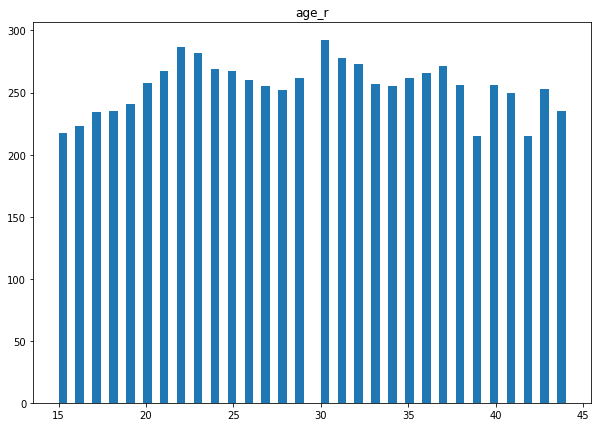

In [41]:
plt.figure(figsize = (10,7))

plt.hist(resp['age_r'], bins = 60)

plt.title('age_r')

plt.show()

Make a histogram of `numfmhh`, the number of people in the respondent's household.

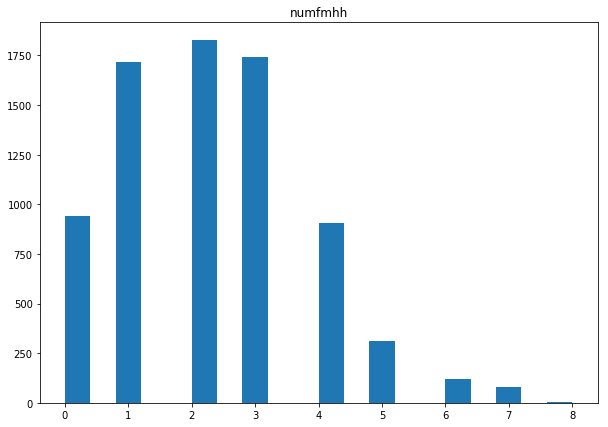

In [42]:
plt.figure(figsize = (10,7))

plt.hist(resp['numfmhh'], bins = 20)

plt.title('numfmhh')

plt.show()

Make a histogram of `parity`, the number of children borne by the respondent.  How would you describe this distribution?

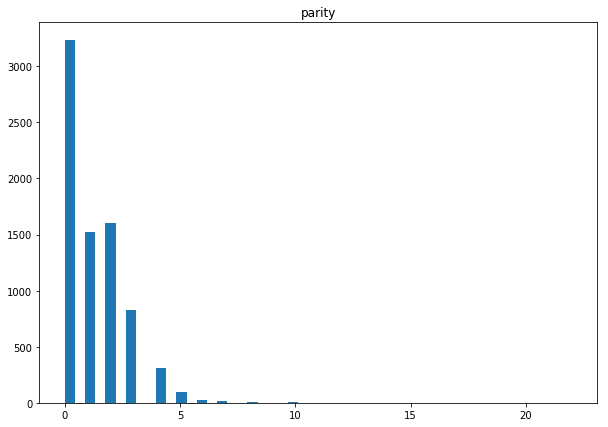

In [43]:
plt.figure(figsize = (10,7))

plt.hist(resp['parity'], bins = 50)

plt.title('parity')

plt.show()

Use `Hist.Largest` to find the largest values of `parity`.

In [44]:
hist7 = thinkstats2.Hist(resp['parity'])
hist7.Largest(n = 1)

[(22, 1)]

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use `totincr` to select the respondents with the highest income (level 14).  Plot the histogram of `parity` for just the high income respondents.

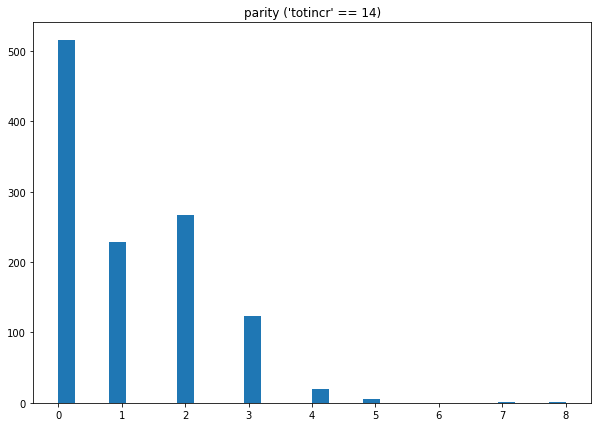

In [45]:
resp1 = resp.loc[resp['totincr'] == 14]

plt.figure(figsize = (10,7))

plt.hist(resp1['parity'], bins = 30)

plt.title('parity (\'totincr\' == 14)')

plt.show()

Find the largest parities for high income respondents.

In [46]:
hist8 = thinkstats2.Hist(resp1['parity'])
hist8.Largest(n = 1)

[(8, 1)]

Compare the mean `parity` for high income respondents and others.

In [47]:
resp2 = resp.loc[resp['totincr'] != 14]

print('High income mean parity:', np.mean(resp1['parity']))
print('Others mean parity:', np.mean(resp2['parity']))
print('Difference:', np.mean(resp2['parity']) - np.mean(resp1['parity']))

High income mean parity: 1.0758620689655172
Others mean parity: 1.2495758136665125
Difference: 0.17371374470099532


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [48]:
d_pa_hio = cohen_d(resp1['parity'], resp2['parity'])

print('d parity hio:', d_pa_hio)
print('d pregnancy length fo:', d_prglng_fo)

d parity hio: -0.12511665513356832
d pregnancy length fo: 0.028879051899871788


The difference on the parity between high income and others is 6 times biger than the difference in pregnancy length for first babies and others.

### 3)

The mode of a distribution is the most frequent value; see http://wikipedia.org/wiki/Mode_(statistics). Write a function called Mode that takes a Hist and returns the most frequent value.

As a more challenging exercise, write a function called AllModes that returns a list of value-frequency pairs in descending order of frequency.

In [49]:
hist1

Hist({1: 1, 2: 2, 3: 3, 4: 4, 5: 2, 6: 1, 37: 1, 8: 1})

In [50]:
def mode(hist):
    mode_fq = 0
    for key in hist:
        if hist[key] > mode_fq:
            mode = key
            mode_fq = hist[key]
    return (mode, mode_fq)
            
mode(hist1)

(4, 4)

In [51]:
def AllModes(hist):
    listoftuples = []
    for i in range(0, len(hist)):
        listoftuples.append(mode(hist))
        del hist[mode(hist)[0]]
    return listoftuples
            
AllModes(hist1)

[(4, 4), (3, 3), (2, 2), (5, 2), (1, 1), (6, 1), (37, 1), (8, 1)]

### 4) 

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Plot the comparative histograms and Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

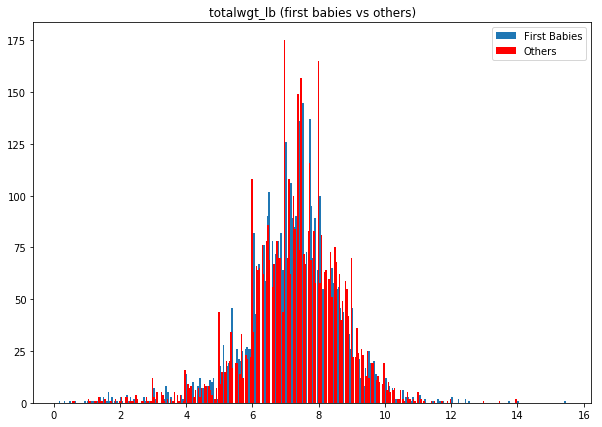

In [52]:
fig = plt.figure(figsize = (10,7))

plt.hist(first_babies['totalwgt_lb'], bins = 300, label ='First Babies', align = 'right')
plt.hist(others['totalwgt_lb'], bins = 300, color = 'red', label ='Others', align = 'left')

plt.legend()
plt.title('totalwgt_lb (first babies vs others)')
plt.show()

In [53]:
print('First babies mean totalwgt_lb:', mean(first_babies['totalwgt_lb']))
print('Others mean totalwgt_lb:', mean(others['totalwgt_lb']))
print('Difference:', mean(first_babies['totalwgt_lb']) - mean(others['totalwgt_lb']))

First babies mean totalwgt_lb: 7.201094430437772
Others mean totalwgt_lb: 7.325855614973262
Difference: -0.12476118453549034


In [54]:
# Last part already made it in cell 35

**Javier Fernández Suárez**